### Importing The Libaries


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd

### Importing The Dataset

In [4]:
data = pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Data Preprocessing


In [28]:
# Dropping any missing values
data.dropna(inplace=True)

# Convert Categorical to numerical variables
c_col = data.select_dtypes(include=['object']).columns
data[c_col] = data[c_col].apply(pd.Categorical)
data[c_col] = data[c_col].apply(lambda x: x.cat.codes)
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].apply(lambda x: x.timestamp())
data.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0.0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0.0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,0.0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,0.0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0.0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0


In [15]:

# Define features (X) and target (y)
X = data.drop(columns=['price'])
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Training The Models

In [18]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest Regression
ran_f = RandomForestRegressor(n_estimators=100, random_state=42)
ran_f.fit(X_train, y_train)

# Decision Tree Regression
dec_t = DecisionTreeRegressor(random_state=42)
dec_t.fit(X_train, y_train)

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### Testing The Models

In [20]:
lr_pred = lr.predict(X_test)
ran_f_pred = ran_f.predict(X_test)
dec_t_pred = dec_t.predict(X_test)
gb_pred = gb.predict(X_test)

model = ['LinearRegression','DecisionTreeRegression','RandomForestRegression','GradientBoostingRegression']
error = [mean_squared_error(y_test, lr_pred), mean_squared_error(y_test,ran_f_pred), mean_squared_error(y_test, dec_t_pred), mean_squared_error(y_test,gb_pred)]

result = pd.DataFrame({
    "Model":model,
    "MSE":error
})
result

,Model,MSE
0,LinearRegression,6.785501e+11
1,DecisionTreeRegression,6.698831e+11
2,RandomForestRegression,7.289987e+11
3,GradientBoostingRegression,6.612064e+11


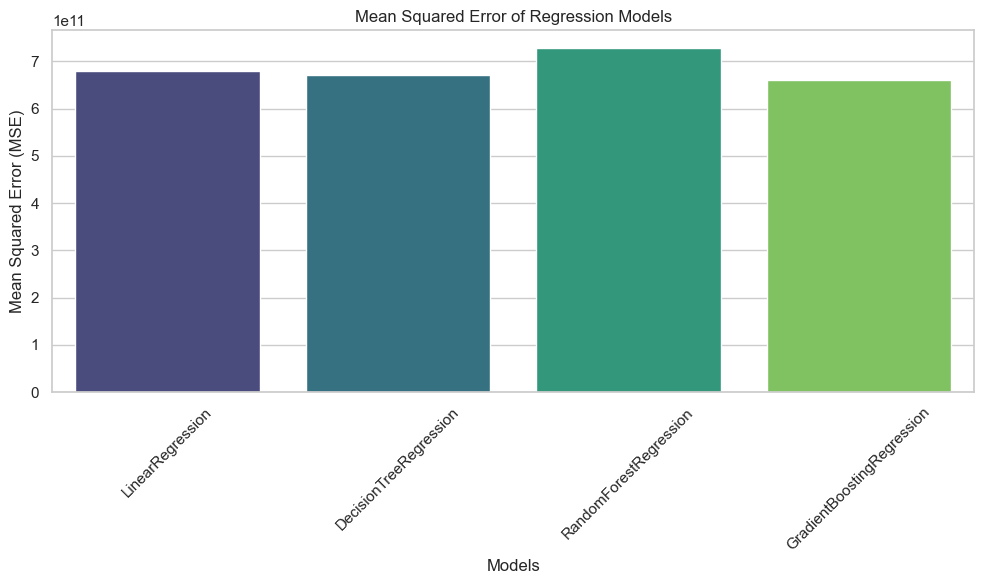

In [21]:

sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=result, palette='viridis')

plt.xticks(rotation=45)

plt.title('Mean Squared Error of Regression Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')

# Show plot
plt.tight_layout()
plt.show()

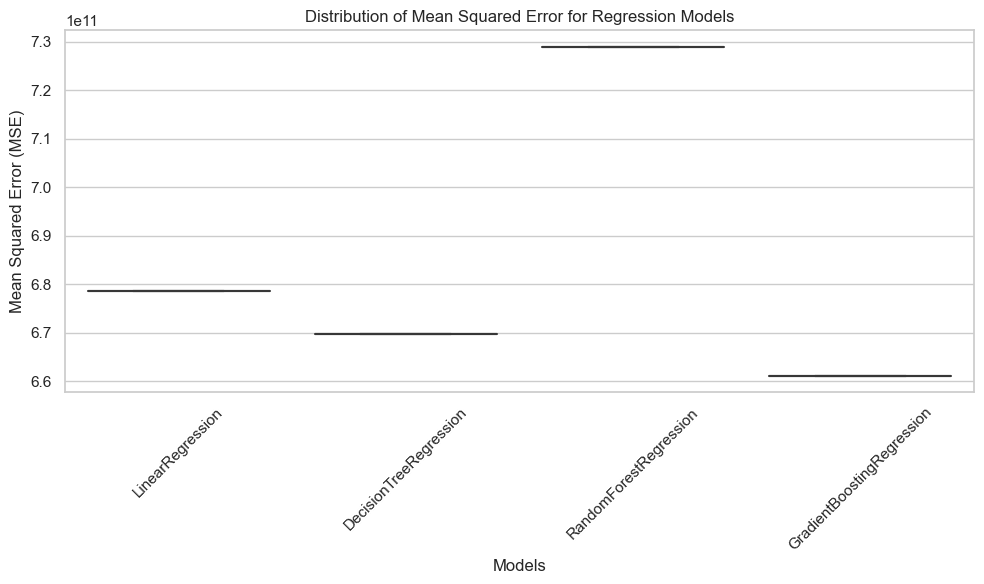

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='MSE', data=result, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Mean Squared Error for Regression Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20104\3111775354.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Model', y='MSE', data=result, marker='o', palette='viridis')


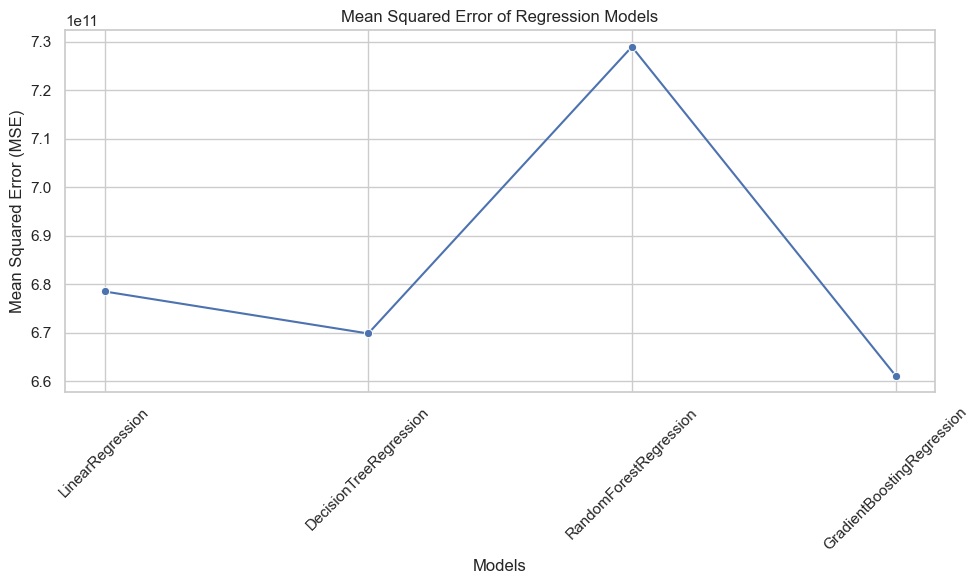

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='MSE', data=result, marker='o', palette='viridis')
plt.xticks(rotation=45)
plt.title('Mean Squared Error of Regression Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best score: 60825624566.86629
